# *Pycarat after applying pca *

In [ ]:
pip install pycaret scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from pycaret.classification import setup, compare_models, create_model, evaluate_model, predict_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the datasets
analyte1 = pd.read_csv('/content/Analyte1.csv')
analyte2 = pd.read_csv('/content/Analyte2.csv')
analyte3 = pd.read_csv('/content/Analyte3.csv')

# Combine the datasets
combined_data = pd.concat([analyte1, analyte2, analyte3], ignore_index=True)

# Add the 'Analyte' column to label each group
combined_data.loc[:len(analyte1)-1, 'Analyte'] = 'Analyte 1'
combined_data.loc[len(analyte1):len(analyte1)+len(analyte2)-1, 'Analyte'] = 'Analyte 2'
combined_data.loc[len(analyte1)+len(analyte2):, 'Analyte'] = 'Analyte 3'

# Encode 'Analyte' column into numeric labels
combined_data['Analyte_Label'] = combined_data['Analyte'].map({'Analyte 1': 0, 'Analyte 2': 1, 'Analyte 3': 2})

# Define the features (sensor readings) and labels
X = combined_data[['Sensor1', 'Sensor2', 'Sensor3']]  # Replace with actual sensor column names
y = combined_data['Analyte_Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




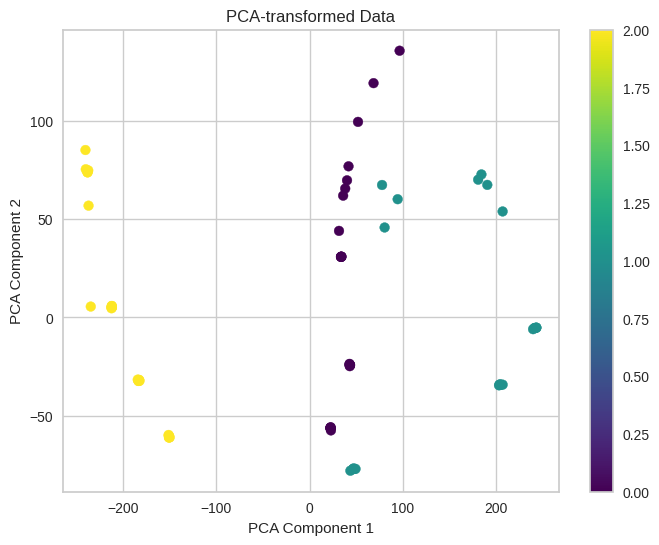

In [ ]:
# Step 1: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA-transformed features
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['target'] = y

# Plot the PCA-transformed data (optional)
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['target'], cmap='viridis')
plt.title('PCA-transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [ ]:
# Step 2: Feed the PCA-transformed data into PyCaret
clf = setup(data=pca_df, target='target', verbose=False)

# Compare models and select the top 5 models
best_models = compare_models(n_select=5)

# Print the best models
print("Top 5 Best Models:")
for i, model in enumerate(best_models, 1):
    print(f"{i}. {model}")

# Train the best model
best_model = create_model(best_models[0])

# Evaluate the best model
evaluate_model(best_model)

# Test the best model (optional, here using holdout data from PyCaret's setup)
predictions = predict_model(best_model)

# Show test results
print(predictions)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5440
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2950
dt,Decision Tree Classifier,0.9800,0.9833,0.9800,0.9867,0.9787,0.9688,0.9735,0.0520
ada,Ada Boost Classifier,0.9800,0.0000,0.9800,0.9867,0.9787,0.9688,0.9735,0.1160
gbc,Gradient Boosting Classifier,0.9800,0.0000,0.9800,0.9867,0.9787,0.9688,0.9735,0.2330
et,Extra Trees Classifier,0.9800,1.0000,0.9800,0.9867,0.9787,0.9688,0.9735,0.1720
qda,Quadratic Discriminant Analysis,0.9600,0.0000,0.9600,0.9533,0.9507,0.9354,0.9457,0.0280
lightgbm,Light Gradient Boosting Machine,0.9600,0.9867,0.9600,0.9400,0.9467,0.9375,0.9530,0.5940
nb,Naive Bayes,0.9400,1.0000,0.9400,0.9433,0.9307,0.9060,0.9207,0.0550
xgboost,Extreme Gradient Boosting,0.9400,0.9733,0.9400,0.9600,0.9360,0.9062,0.9205,0.1150


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Top 5 Best Models:
1. LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4861, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
2. RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=4861, verbose=0,
                       warm_start=False)
3. DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_dep

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9565,1.0000,0.9565,0.9620,0.9565,0.9348,0.9375


          PCA1        PCA2  target  prediction_label  prediction_score
45  204.556229  -33.967434       1                 1            1.0000
37   47.342300  -76.659927       1                 1            0.9931
16   34.356575   30.863394       0                 0            1.0000
9    96.687569  135.436081       0                 0            0.5512
65 -150.239975  -60.882717       2                 2            0.9997
63 -212.296082    5.167229       2                 2            1.0000
61 -183.776169  -32.265099       2                 2            1.0000
42  207.370132  -34.154274       1                 1            1.0000
30  181.059570   69.952744       1                 1            1.0000
69 -212.753235    4.645633       2                 2            1.0000
21   22.263784  -56.117737       0                 0            1.0000
14   43.186642  -24.763769       0                 0            0.9943
22   33.965408   30.802662       0                 0            1.0000
50 -15